In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from skimage.color import rgb2lab, lab2lch,lab2rgb,lch2lab
import hogehoge

def show(image):
    fig = plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.show()

def show2(image1, image2):
    fig, axes = plt.subplots(1, 2, figsize=(10, 10))
    axes[0].imshow(image1)
    axes[1].imshow(image2)
    plt.show()

def show3(image1, image2):
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes[0].imshow(image1)
    axes[1].hist(image2)
    plt.show()
    
def rgb2lch(rgbimg):
    img_lab = rgb2lab(rgbimg)
    return lab2lch(img_lab)
    

In [2]:
with open(str(hogehoge.CONF_PATH), "r") as f:
    config = hogehoge.toml.load(f)
RGB_COLORMAP_10 = config["rgb_colormap_10"]
rgb_colorscheme_10 = np.array(RGB_COLORMAP_10)
RGB_COLORMAP_5 = config["rgb_colormap_5"]
rgb_colorscheme_5 = np.array(RGB_COLORMAP_5)
RGB_COLORMAP_3 = config["rgb_colormap_3"]
rgb_colorscheme_3 = np.array(RGB_COLORMAP_3)

KeyError: 'rgb_colormap_10'

In [19]:
show(rgb_colorscheme_10[:,None].reshape(1,10,3))
show(rgb_colorscheme_5[:,None].reshape(1,5,3))
show(rgb_colorscheme_3[:,None].reshape(1,3,3))

NameError: name 'rgb_colorscheme_10' is not defined

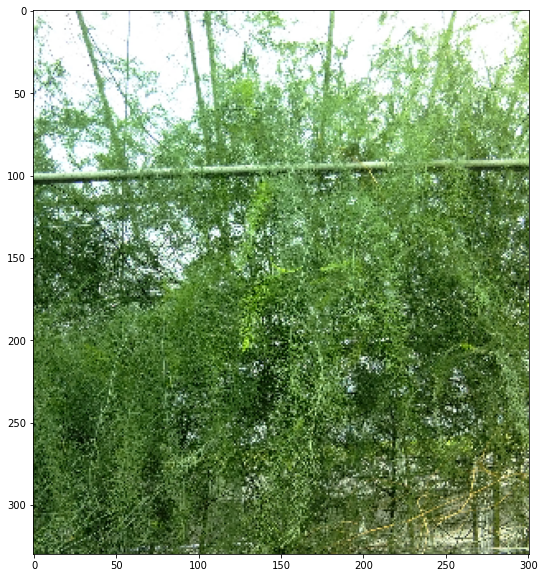

In [20]:
def read_image(input_name):
    leaf_image = cv2.imread(input_name)
    leaf_image = cv2.resize(leaf_image, None, fx=0.2, fy=0.2)
    return leaf_image

"""
Load images
"""
#input_name = "data/PXL_20210812_015808383.jpg"
#input_name = "data/IMG_20210906_152826.jpg"
input_name = "data/IMG_20210906_153341.jpg"
input_name_1 = "data/presentation/1632321916457.jpg"
input_name_2 = "data/presentation/1632321916505.jpg"
input_name_3 = "data/presentation/1632321916525.jpg"
input_name_4 = "data/presentation/1632321916545.jpg"
input_name_5 = "data/presentation/1632321916549.jpg"
input_name_6 = "data/verification_data/move_by_5cm/1631583968167.jpg"
#input_name = "data/IMG_20210906_160331_1.jpg"

leaf_image_raw = read_image(input_name_6)[100:430]
leaf_image_rgb = cv2.cvtColor(leaf_image_raw, cv2.COLOR_BGR2RGB)
show(leaf_image_rgb)

In [21]:
# a = [input_name_1, input_name_2, input_name_3, input_name_4,input_name_5,input_name_6]
# for i in a:
#    img = read_image(i)
#    leaf_image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#    img_lch = rgb2lch(leaf_image_rgb)
#    img_lch[:, :, 1] = (255 * np.log10(img_lch[:, :, 1] + 1) / np.log10(255)).astype(np.uint8)  #perceptual color spaces
#    show3(leaf_image_rgb,img_lch[:,:,1].reshape(-1))

# LCh色空間を用いた色検出

(array([5413.00, 1604.00, 1464.00, 1145.00, 1537.00, 2504.00, 6039.00,
        31026.00, 47892.00, 706.00]),
 array([0.00, 20.50, 41.00, 61.50, 82.00, 102.50, 123.00, 143.50, 164.00,
        184.50, 205.00]),
 <BarContainer object of 10 artists>)

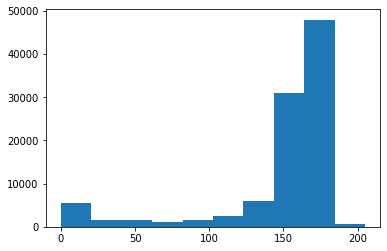

In [22]:
#LCHのCを使用している
img_lch = rgb2lch(leaf_image_rgb)

img_lch[:, :, 1] = (255 * np.log10(img_lch[:, :, 1] + 1) / np.log10(255)).astype(np.uint8)  #perceptual color spaces
plt.hist(img_lch[:,:,1].reshape(-1))

(array([1694.00, 5108.00, 10915.00, 15694.00, 16317.00, 13495.00, 9753.00,
        6893.00, 4724.00, 14737.00]),
 array([1.37, 11.24, 21.10, 30.96, 40.82, 50.69, 60.55, 70.41, 80.27,
        90.14, 100.00]),
 <BarContainer object of 10 artists>)

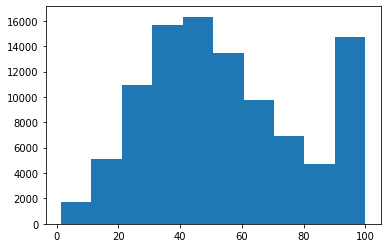

In [23]:
plt.hist(img_lch[:,:,0].reshape(-1))

(array([96.00, 42031.00, 48762.00, 3268.00, 4198.00, 480.00, 236.00,
        170.00, 8.00, 81.00]),
 array([1.34, 1.81, 2.27, 2.74, 3.21, 3.67, 4.14, 4.60, 5.07, 5.54, 6.00]),
 <BarContainer object of 10 artists>)

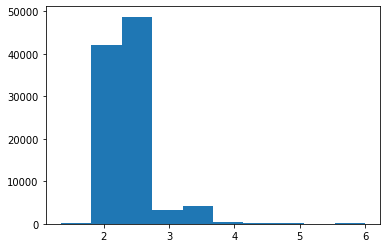

In [24]:
plt.hist(img_lch[:, :, 2].reshape(-1))

## Chroma成分を

In [25]:
## bgrlower & bgrupperとは何だ?->２値化のために使用する、範囲。よっしーさんが決定したと思われる。
lchLower = np.array([50, 0, 0])
lchUpper = np.array([100, 150, 6])
lsh_mask = cv2.inRange(img_lch, lchLower, lchUpper) #cv2.inRangeは2値化するために使用する。Q：LCH色空間なのに、BGRの色空間で範囲を設定している
lsh_mask = cv2.resize(lsh_mask, leaf_image_raw.shape[-2::-1])

In [26]:
np.unique(lsh_mask)

array([  0, 255], dtype=uint8)

# 緑成分優位な画像成分の抽出

In [27]:
leaf_image_rgb.shape

(330, 301, 3)

In [28]:
leaf_image_raw.shape

(330, 301, 3)

/home/inaho/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


(330, 301, 3) float64


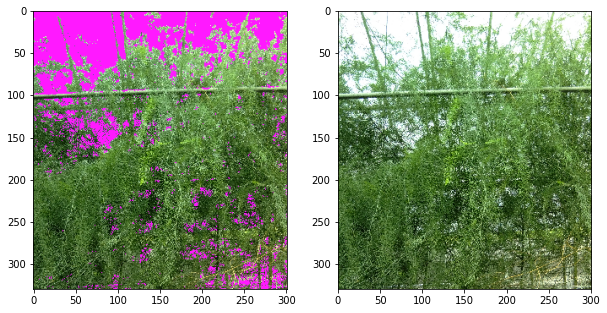

In [29]:
leaf_image_float = leaf_image_raw.astype(np.float) / 255
leaf_image_float += 10e-8 #???

lsh_where = np.where(lsh_mask == 255)# -> 引数にとったarray配列に対して、条件に適合している値の添字をtupleで返す

leaf_image_float[lsh_where[0], lsh_where[1], :] = (1.0, 0.1, 1.0)

print(leaf_image_float.shape, leaf_image_float.dtype)
show2(cv2.cvtColor((leaf_image_float * 255).astype(np.uint8), cv2.COLOR_BGR2RGB), leaf_image_rgb)

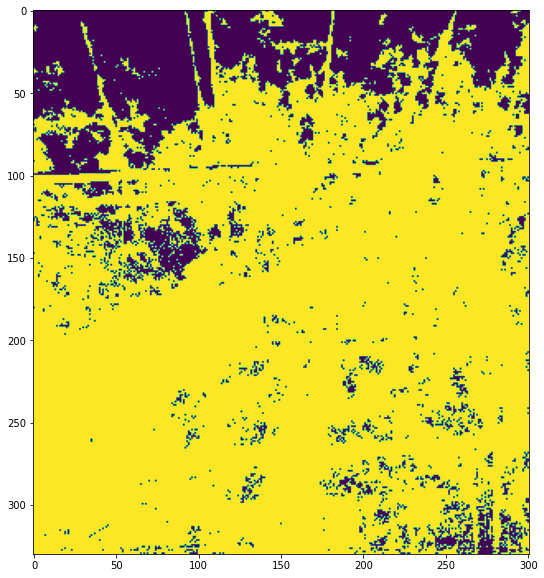

In [30]:
# leaf_image_float = leaf_image_raw.astype(np.float) / 255
# leaf_image_float += 10e-8 #???

#lsh_where = np.where(lsh_mask == 255)# -> 引数にとったarray配列に対して、条件に適合している値の添字をtupleで返す

#leaf_image_float[lsh_where[0], lsh_where[1], :] = (1.0, 0.1, 1.0)

#leaf_image_float[:,...,:]はleaf_image_floatと全く一緒。
#is_green_dominant = (np.max(leaf_image_float[:, ..., :] / leaf_image_float[:, :, 1][:, :, np.newaxis], axis=2) > 0.99) & (
#    np.max(leaf_image_float, axis=2) > 0.5)

# mask_green_dominant = np.zeros_like(is_green_dominant, np.uint8)
# mask_green_dominant[is_green_dominant] = 255
mask_green_dominant = lsh_mask
show(255 - mask_green_dominant)  # yellow:255 black:0

## バッチ毎に空白成分の平均値を出力 -> 

array([[0.04, 0.04, 0.04, ..., 0.00, 0.00, 0.00],
       [0.04, 0.04, 0.04, ..., 0.00, 0.00, 0.00],
       [0.04, 0.04, 0.04, ..., 0.00, 0.00, 0.00],
       ...,
       [0.99, 0.99, 0.99, ..., 0.00, 0.00, 0.00],
       [0.99, 0.99, 0.99, ..., 0.00, 0.00, 0.00],
       [0.99, 0.99, 0.99, ..., 0.00, 0.00, 0.00]])

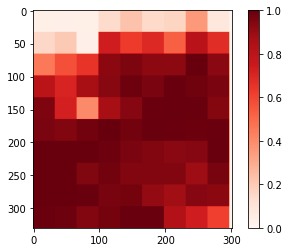

In [31]:
height_size, width_size = mask_green_dominant.shape
num_divided_width = 9

grid_size = int(width_size/num_divided_width)
num_divided_height = int(height_size/grid_size)

overgrow_average = np.zeros([num_divided_height,num_divided_width])
green_average = np.zeros([height_size,width_size])
green_average_values = np.zeros([height_size, width_size])# 値出力画像用

for i in range(num_divided_height):
    h_s_point = grid_size*i
    h_e_point = grid_size*(i+1)
    divided_green_dominant = mask_green_dominant[h_s_point:h_e_point,:]
    
    for j in range(num_divided_width):
        w_s_point = grid_size*j
        w_e_point = grid_size*(j+1)
        
        green_num = np.sum(divided_green_dominant[:,w_s_point:w_e_point] == 0)
        average = green_num / (grid_size ** 2)
        #make image with average_value
        text_point = (w_s_point+num_divided_width//2, h_s_point+num_divided_height//2)
        cv2.putText(green_average_values, 
                    text=f"{average*100:.1f}", 
                    org=text_point,
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=0.3,
                    color= (255, 255, 255) if average > 0.5 else (0,0,0),
                    thickness=1,
                    lineType=cv2.LINE_4)

        overgrow_average[i,j] = average
        green_average[h_s_point:h_e_point,:][:,w_s_point:w_e_point] = average
        
plt.imshow(green_average,cmap="Reds")
plt.colorbar()
green_average

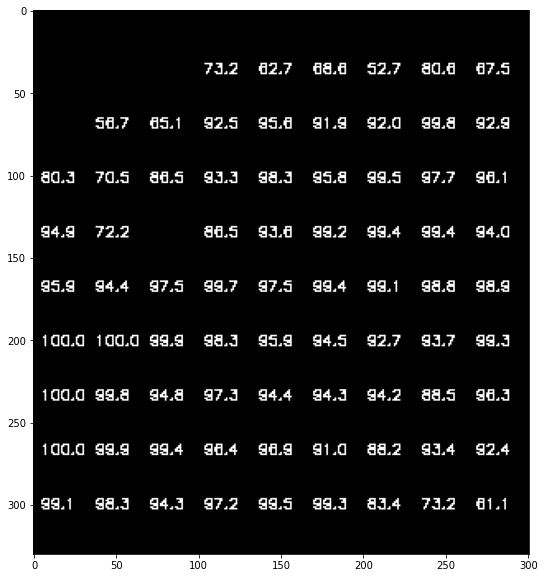

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(green_average_values,cmap="gray")

In [33]:
# green_average
green_average_255 = (255 * legreen_average)
green_average_rgb = np.zeros([height_size,width_size,3])
green_average_rgb[:,:,0] = green_average_255
green_average_rgb = green_average_rgb.astype(np.uint8)

NameError: name 'legreen_average' is not defined

In [34]:
np.set_printoptions(formatter={'float': '{:.2f}'.format})

In [35]:
# colormap作成
rgb_colormap =[[100,0,205],[0,0,255],[0,102,204],[0,200,200],[0,204,102],[0,203,0],[102,203,0],[200,200,0],[200,100,0],[200,0,0]]
green_average_rgb = np.zeros([height_size, width_size, 3])

# colorconverter
def convert_color(output_img, condition_img, low_condition, high_condition, value):
    output_img[(low_condition < condition_img) & (condition_img <= high_condition)] = value
# convert 
# for i in range(0,len(rgb_colormap)):
#    convert_color(green_average_rgb, green_average, i*0.1, i*0.1+0.1, rgb_colormap[i])

convert_color(green_average_rgb, green_average, 0, 0.85, rgb_colormap[0])
convert_color(green_average_rgb, green_average, 0.85, 0.99, rgb_colormap[8])
convert_color(green_average_rgb, green_average, 0.99, 1.0, rgb_colormap[9])

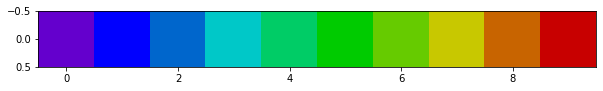

In [36]:
rgb_colormap = np.array(rgb_colormap)
show(rgb_colormap.reshape(1,10,3))

(330, 301, 3)


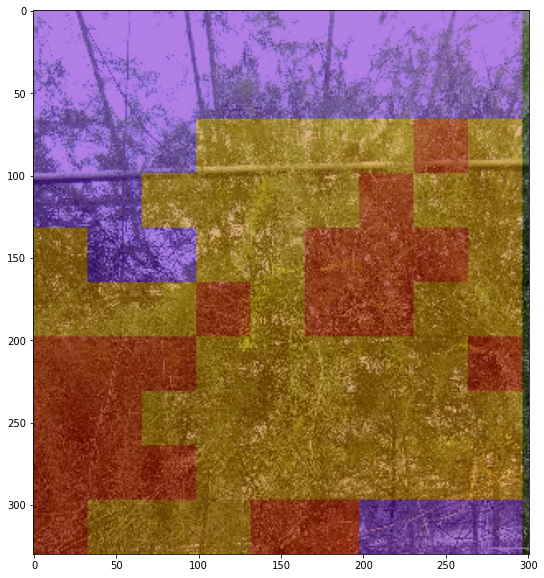

In [37]:
#アルファブレンド
alpha = 0.5
overlay_img = alpha * leaf_image_rgb + (1 - alpha) * green_average_rgb
#plt.imshow(leaf_image_rgb)
print(overlay_img.shape)
show(overlay_img.astype(np.uint8))

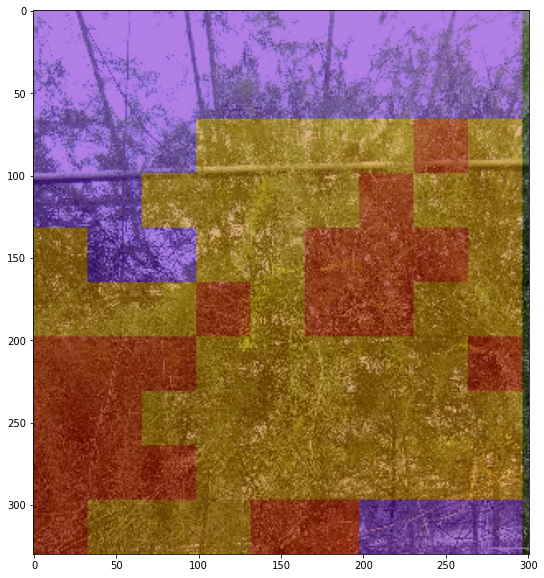

In [38]:
show(overlay_img.astype(np.uint8))

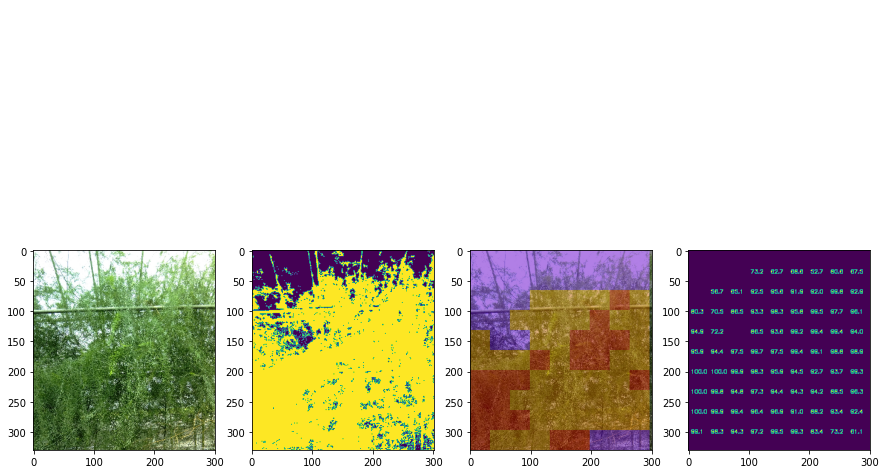

In [39]:
n_data = 3 # 表示するデータ数
row=1 # 行数
col=4 # 列数
fig, ax = plt.subplots(nrows=row, ncols=col,figsize=(15,10))
images = [leaf_image_rgb, 255 - mask_green_dominant, overlay_img.astype(np.uint8), green_average_values]

fig.suptitle("MNIST data-set", fontsize=24, color='white')
for i, img in enumerate(images):
    _r= i//col
    _c= i%col

    #ax[_r,_c].set_title(i, fontsize=16, color='white')
    #ax[_r,_c].axes.xaxis.set_visible(False) # X軸を非表示に
    #ax[_r,_c].axes.yaxis.set_visible(False) # Y軸を非表示に
    ax[_c].imshow(img) # 画像を表示

plt.show()

# 唐子メソッド

In [74]:
from Ikeuchi_method import normalize, discretize, get_gridview, make_color_map_5, alpha_blend

In [77]:
import Ikeuchi_method

In [78]:
import importlib
importlib.reload(Ikeuchi_method)

hoge


<module 'Ikeuchi_method' from '/home/inaho/IkeutchiAI/pseudo_leaf_density_estimator/Ikeuchi_method.py'>

In [63]:
blur_img = normalize(cv2.blur(255 - lsh_mask, (200, 200)),v_min=20)

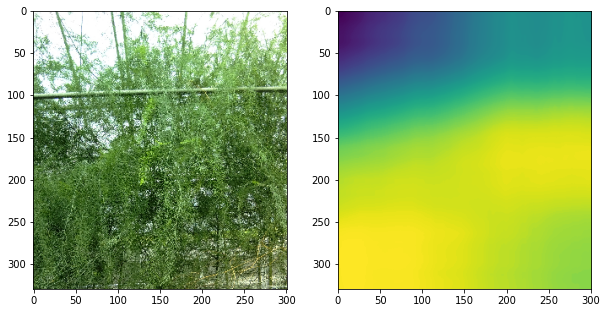

In [64]:
show2(leaf_image_rgb, blur_img)

In [56]:
blur_img

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [225, 225, 225, ...,   0,   0,   0],
       [225, 225, 225, ...,   0,   0,   0],
       [225, 225, 225, ...,   0,   0,   0]], dtype=uint8)

In [52]:
overgrow_average, green_average, green_average_values = get_gridview(blur_img,num_divided_width=6)

In [53]:
green_average_rgb = make_color_map_5(leaf_image_rgb.shape, green_average)

hogehoge
img_out [[[0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  ...
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]]

 [[0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  ...
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]]

 [[0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  ...
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]]

 ...

 [[0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  ...
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]]

 [[0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  ...
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]]

 [[0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  ...
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]]]
hogehoge
img_out [[[0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  ...
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]]

 [[0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  ...
  [0.00 0.00 0.00]
  [0.00 0.00 0.00]
  [0.

In [54]:
overlay_img = alpha_blend(leaf_image_rgb, green_average_rgb)

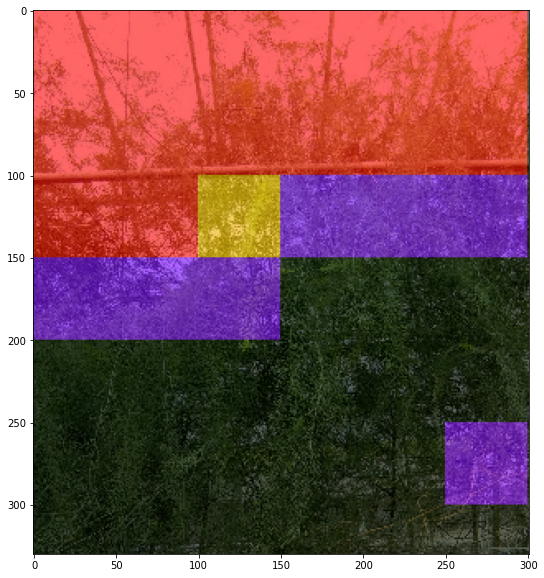

In [55]:
show(overlay_img)